In [1]:
import numpy as np
import pandas as pd
import cv2
import os

In [2]:
df = pd.read_csv('train_info.csv')
df.head()

,file_name,label
0,captcha05723.png,146
1,captcha01899.png,336
2,captcha05314.png,272
3,captcha04466.png,71
4,captcha04602.png,314


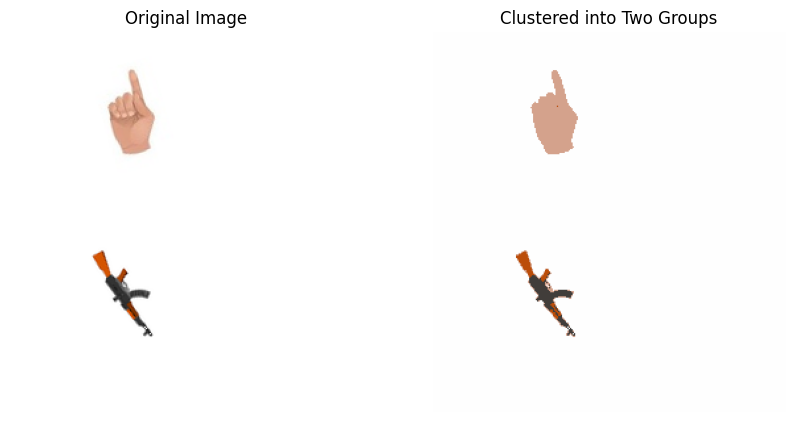

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image_path = "/Users/sinajani/Desktop/captcha/data/train_images/captcha05799.png"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Resize for faster computation (optional, skip if image is small)
# original_size = image_rgb.shape[:2]
# image_resized = cv2.resize(image_rgb, (200, 200))

# Reshape the image to a 2D array of pixels and 3 color values (R, G, B)
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Apply KMeans clustering to segment the image into 2 clusters (2 groups)
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixel_values)
clustered_pixels = kmeans.labels_.reshape(image_rgb.shape[:2])

# Visualize the clustered image
segmented_image = np.zeros_like(image_rgb)

for i in range(k):
    segmented_image[clustered_pixels == i] = kmeans.cluster_centers_[i]

# Resize back to original image size for better visualization
segmented_image_fullsize = cv2.resize(segmented_image.astype(np.uint8), (original_size[1], original_size[0]))

# Display original and clustered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_fullsize)
plt.title("Clustered into Two Groups")
plt.axis("off")

plt.show()


In [12]:
clustered_pixels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [3]:
def preprocess(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return gray


def load_data(data, img_dir):
    images = []
    labels = []

    for i in range(len(data)):
        name = data['file_name'][i]
        label = data['label'][i]

        full_path = os.path.join(img_dir, name)
        img = cv2.imread(full_path)
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        images.append(image)
        labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, label

In [ ]:
import cv2
import numpy as np

def detect_hand_orientation(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use thresholding to create a binary image
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return None

    # Find the largest contour, assuming it's the hand
    largest_contour = max(contours, key=cv2.contourArea)

    # Fit an ellipse around the largest contour
    if len(largest_contour) >= 5:  # Need at least 5 points to fit an ellipse
        ellipse = cv2.fitEllipse(largest_contour)
        center, axes, angle = ellipse

        # Draw the ellipse and orientation line on the image for visualization
        output_image = image.copy()
        cv2.ellipse(output_image, ellipse, (0, 255, 0), 2)

        # Display results
        cv2.imshow("Hand Orientation", output_image)
        cv2.waitKey(1000)
        # cv2.destroyAllWindows()

        return angle
    else:
        return None


In [12]:
hand_orientation = detect_hand_orientation("/Users/sinajani/Desktop/captcha/data/train_images/captcha0331.png")
print(f"Hand pointing angle: {hand_orientation} degrees (relative to horizontal axis)")

Hand pointing angle: 132.75608825683594 degrees (relative to horizontal axis)


In [2]:
import cv2
import os
from PIL import Image
import numpy as np

# Load the image
image_path = "captcha0324.png"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Output directory to save objects
output_dir = "cropped_objects"
os.makedirs(output_dir, exist_ok=True)

# Loop through each contour and save the cropped object
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    cropped_object = image_rgb[y:y+h, x:x+w]  # Crop the object from the original image
    output_path = os.path.join(output_dir, f"object_{i+1}.png")
    
    # Save the cropped object using PIL
    Image.fromarray(cropped_object).save(output_path)
    print(f"Saved: {output_path}")


[ WARN:0@4.046] global loadsave.cpp:241 findDecoder imread_('captcha0324.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
